In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision
import shutil 


batch_size= 64

mean = -0.1
std=1
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('../datasets/mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                                torchvision.transforms.Resize([32, 32]),
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(
                                 (mean,), (std,))
                             ])),
  batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../datasets/mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                                torchvision.transforms.Resize([32, 32]),
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(
                                 (mean,), (std,))
                             ])),
  batch_size=16, shuffle=False, drop_last= True)

for x,y in train_loader:
    break
    
vmin= x.min().item()
vmax= x.max().item()
print('range : ',vmin, vmax)

range :  0.10000000149011612 1.100000023841858


In [2]:
import torch
import shutil 
import numpy as np
from torch import nn
from modules.kernels import get_gaussian
from modules.models.decoder import simple_generator
from modules.models.forward_model import forward_modelA
from modules.models.forward_H import modelH
from modules.train_utils import train
from modules.custom_activations import inc_m
import matplotlib.pyplot as plt
from modules.models.preprocess_H_weights import ifft_2d_with_fftshift_real
from modules.noise import poisson_noise
from modules.models.classifiers import simple_mnist_classifier

device='cuda' if torch.cuda.is_available() else 'cpu'

classifier = simple_mnist_classifier(32).to(device)
classifier.load_state_dict(torch.load('saved_models/mnist_classifier.pth', map_location=device)['model_state_dict'])

<All keys matched successfully>

In [3]:
img_size= 32
m_inc_epoc= 1

def inc_1_after_60_interval_10(m, epoch):
    if epoch>60 and epoch%10==0:
        m=inc_m(m, epoch, 1)
    return m

sPSF= torch.tensor(get_gaussian(side_len=5, s=1)).float().to(device)
exPSF= torch.tensor(get_gaussian(side_len=5, s=1)).float().to(device)

criterion= nn.L1Loss().to(device)
train_model_iter, train_H_iter= 1, 1

## Test run

In [4]:
'''
from modules.custom_activations import sigmoid_custom as H_activation

T=5
H_init= 'fft'
H_weight_preprocess= ifft_2d_with_fftshift_real
m_inc_proc =inc_1_after_100_interval_10

decoder= simple_generator(T, img_size).to(device)
opt_model= torch.optim.Adam(decoder.parameters(), lr= 0.001)

H_generator = modelH(T, img_size = img_size, preprocess_H_weights= H_weight_preprocess, device = device, initialization_bias=0, activation = H_activation, init_method= H_init).to(device)
opt_H= torch.optim.Adam(H_generator.parameters(), lr= 0.01)

noise=True # gradient exploding is not there (because I have added change the image range [1,2] -> which not contains 0s in it: forward_model.py)
train_model_iter, train_H_iter= 1, 1

train(decoder, forward_modelA, H_generator, sPSF, exPSF, criterion, [opt_model, opt_H], train_loader, test_loader, device, T, 10, 1, train_model_iter, train_H_iter, m_inc_epoc, m_inc_proc, './1', noise, classifier, [mean, std])

'''

"\nfrom modules.custom_activations import sigmoid_custom as H_activation\n\nT=5\nH_init= 'fft'\nH_weight_preprocess= ifft_2d_with_fftshift_real\nm_inc_proc =inc_1_after_100_interval_10\n\ndecoder= simple_generator(T, img_size).to(device)\nopt_model= torch.optim.Adam(decoder.parameters(), lr= 0.001)\n\nH_generator = modelH(T, img_size = img_size, preprocess_H_weights= H_weight_preprocess, device = device, initialization_bias=0, activation = H_activation, init_method= H_init).to(device)\nopt_H= torch.optim.Adam(H_generator.parameters(), lr= 0.01)\n\nnoise=True # gradient exploding is not there (because I have added change the image range [1,2] -> which not contains 0s in it: forward_model.py)\ntrain_model_iter, train_H_iter= 1, 1\n\ntrain(decoder, forward_modelA, H_generator, sPSF, exPSF, criterion, [opt_model, opt_H], train_loader, test_loader, device, T, 10, 1, train_model_iter, train_H_iter, m_inc_epoc, m_inc_proc, './1', noise, classifier, [mean, std])\n\n"

## Experiments

In [5]:
save_path= 'figs/test'


!rm -rf $save_path
!mkdir $save_path

In [7]:
n_gpus = 1 #torch.cuda.device_count()
print(f'n_gpus : {n_gpus}')

n_gpus : 1




RUNNING EXPERIMENT :: figs/test/noise(True)@T(16)@lr_H(0.5)@torch_seed(100)
device : cuda
m : 1
yt range (train): [-0.0006462275050580502 0.8957239389419556]
yt range (test): [-0.001895044930279255 0.9482743144035339]
training loop time (for single epoch): 24.905906200408936 sec
m : 1
yt range (train): [-0.0006605004891753197 0.9608500599861145]
yt range (test): [-0.002174324356019497 1.0084736347198486]
training loop time (for single epoch): 24.543067693710327 sec
m : 1
yt range (train): [-0.0024421410635113716 0.9809635877609253]
yt range (test): [-0.003812256269156933 1.016984224319458]
training loop time (for single epoch): 24.10569739341736 sec
m : 1
yt range (train): [-0.0009393459185957909 1.026689887046814]
yt range (test): [-0.0025105830281972885 1.0133249759674072]
training loop time (for single epoch): 24.528737545013428 sec
m : 1
yt range (train): [-0.0014913100749254227 1.0816563367843628]
yt range (test): [-0.0009621074423193932 1.0363149642944336]
training loop time (f

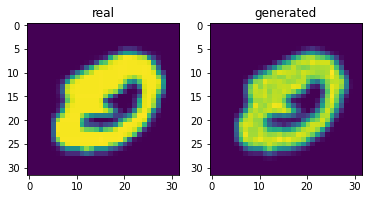

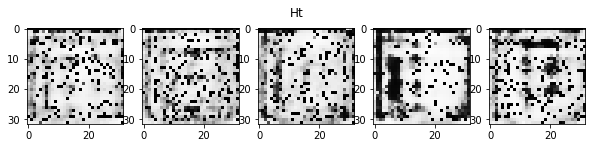

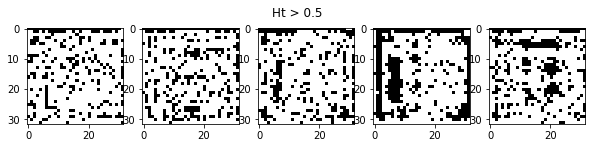

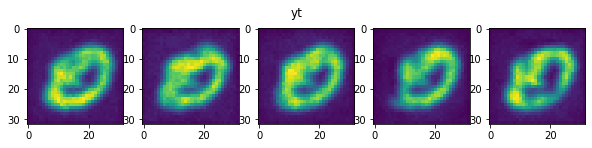

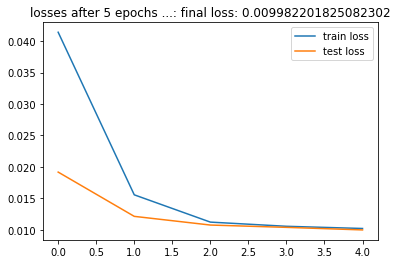

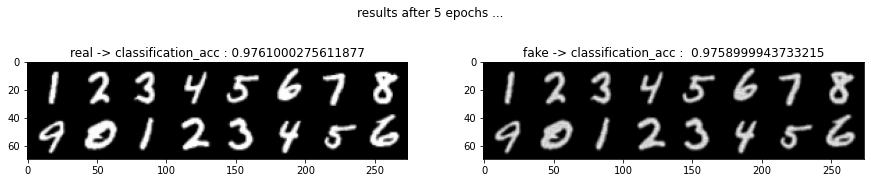

m : 1
yt range (train): [-0.0030396319925785065 1.0237720012664795]
yt range (test): [-0.001449513714760542 1.0403701066970825]
training loop time (for single epoch): 24.337130546569824 sec
m : 1
yt range (train): [-0.0007330793887376785 1.0087350606918335]
yt range (test): [-0.0003417525440454483 1.036108136177063]
training loop time (for single epoch): 24.459898948669434 sec
m : 1
yt range (train): [-0.0019739102572202682 1.0333738327026367]
yt range (test): [-0.000493344385176897 1.0372848510742188]
training loop time (for single epoch): 24.458794355392456 sec
m : 1
yt range (train): [-0.0021636849269270897 1.0456370115280151]
yt range (test): [-0.0019715726375579834 1.0493751764297485]
training loop time (for single epoch): 24.61708354949951 sec
m : 1
yt range (train): [-0.002052588388323784 1.0521055459976196]
yt range (test): [-0.0007251240313053131 1.0234065055847168]
training loop time (for single epoch): 24.3686044216156 sec
show images : X range : [0.10000000149011612, 1.1000

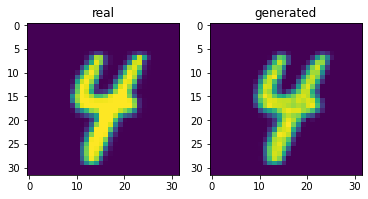

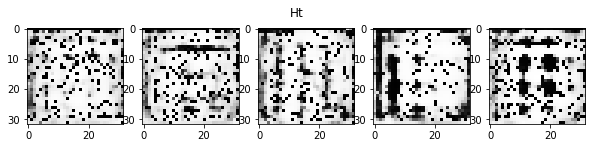

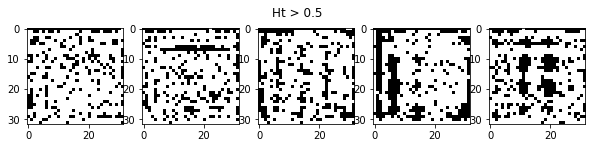

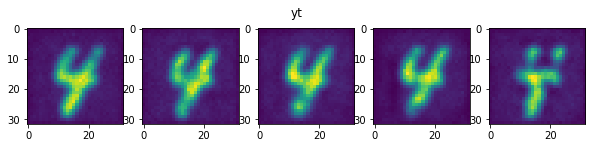

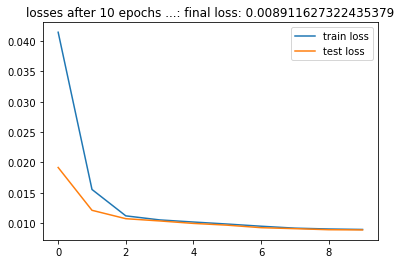

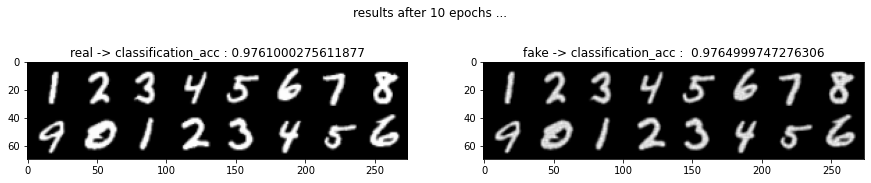



RUNNING EXPERIMENT :: figs/test/noise(True)@T(16)@lr_H(0.5)@torch_seed(101)
device : cuda
m : 1
yt range (train): [0.0010536368936300278 0.8217935562133789]
yt range (test): [0.001473778858780861 0.8336684703826904]
training loop time (for single epoch): 24.421178102493286 sec
m : 1
yt range (train): [0.0016856342554092407 0.9013627767562866]
yt range (test): [-2.463720738887787e-05 0.9031239151954651]
training loop time (for single epoch): 24.295762538909912 sec
m : 1
yt range (train): [-0.0015441346913576126 0.9381712079048157]
yt range (test): [0.0015450557693839073 0.9601866602897644]
training loop time (for single epoch): 24.519320249557495 sec
m : 1
yt range (train): [-0.00029595568776130676 0.9999663829803467]
yt range (test): [0.0009491052478551865 1.0245710611343384]
training loop time (for single epoch): 24.295535564422607 sec
m : 1
yt range (train): [-0.0009288685396313667 1.00455904006958]
yt range (test): [-0.0016000308096408844 1.0010818243026733]
training loop time (fo

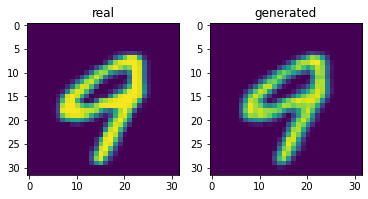

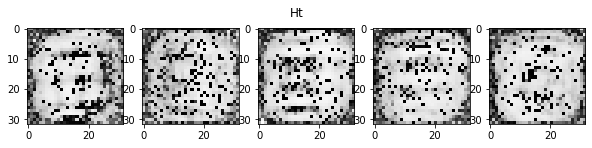

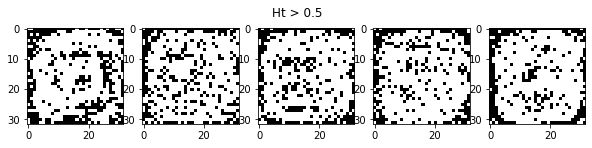

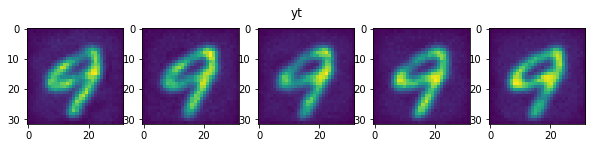

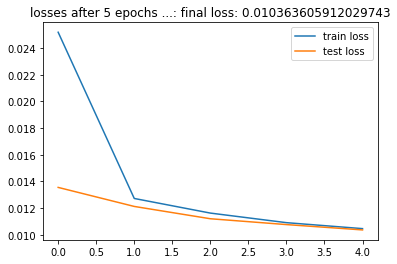

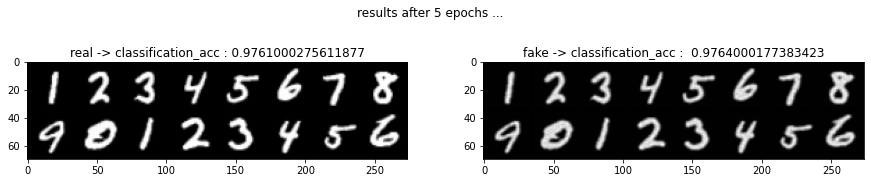

m : 1
yt range (train): [-0.0008342992514371872 1.003983497619629]
yt range (test): [-0.0010962290689349174 0.9998899102210999]
training loop time (for single epoch): 24.37046790122986 sec
m : 1
yt range (train): [-0.0007855156436562538 1.0645705461502075]
yt range (test): [-0.00029949750751256943 1.038612723350525]
training loop time (for single epoch): 24.513279914855957 sec
m : 1


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/n/home06/udithhaputhanthri/.conda/envs/deepTFM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-b39801c0eaf1>", line 49, in <module>
    train(decoder, forward_modelA, H_generator, sPSF, exPSF, criterion, [opt_model, opt_H], train_loader, test_loader, device, T, epochs, show_results_epoch, train_model_iter, train_H_iter, m_inc_epoc, m_inc_proc, save_dir, noise, classifier, [mean, std], noise_K)
  File "/n/home06/udithhaputhanthri/project_udith/aim2/modules/train_utils.py", line 94, in train
    losses_train, model, opt, X, X_hat, Ht, yt, modelH = loop(device, train_loader, model, forward_modelA, modelH, sPSF, exPSF, criterion, opt, 'train', losses_train, epoch, m, train_model_iter, train_H_iter, noise_A, noise_K)
  File "/n/home06/udithhaputhanthri/project_udith/aim2/modules/train_utils.py", line 62, in loop
    loss.backward(re

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/n/home06/udithhaputhanthri/.conda/envs/deepTFM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-b39801c0eaf1>", line 49, in <module>
    train(decoder, forward_modelA, H_generator, sPSF, exPSF, criterion, [opt_model, opt_H], train_loader, test_loader, device, T, epochs, show_results_epoch, train_model_iter, train_H_iter, m_inc_epoc, m_inc_proc, save_dir, noise, classifier, [mean, std], noise_K)
  File "/n/home06/udithhaputhanthri/project_udith/aim2/modules/train_utils.py", line 94, in train
    losses_train, model, opt, X, X_hat, Ht, yt, modelH = loop(device, train_loader, model, forward_modelA, modelH, sPSF, exPSF, criterion, opt, 'train', losses_train, epoch, m, train_model_iter, train_H_iter, noise_A, noise_K)
  File "/n/home06/udithhaputhanthri/project_udith/aim2/modules/train_utils.py", line 62, in loop
    loss.backward(re

In [ ]:
from modules.custom_activations import sigmoid_custom


H_init = 'fft'
H_complex_init= False #override by H_init
H_weight_preprocess= ifft_2d_with_fftshift_real
m_inc_proc =  inc_1_after_60_interval_10
initialization_bias= 0
H_activation= sigmoid_custom
noise_K=1000

epochs=10
show_results_epoch=5

Ts=[16]
noises= [True]
lrs_H= [0.0000001, 0.5, 0.1]
torch_seeds= [100, 101]

for noise in noises:
    for T in Ts:
        for lr_H in lrs_H:
            for torch_seed in torch_seeds:
                if lr_H==0.0000001:continue
                try:
                    if H_weight_preprocess ==None:H_weight_preprocess_name = 'None'
                    else:H_weight_preprocess_name = H_weight_preprocess.__name__
                    if m_inc_proc==None:m_inc_proc_name = 'None'
                    else:m_inc_proc_name = m_inc_proc.__name__

                    save_dir= f'{save_path}/noise({noise})@T({T})@lr_H({lr_H})@torch_seed({torch_seed})'
                    print(f'\n\nRUNNING EXPERIMENT :: {save_dir}')

                    try:shutil.rmtree(save_dir)
                    except:pass

                    torch.manual_seed(torch_seed) #3
                    
                    if n_gpus<=1:
                        decoder= simple_generator(T, img_size).to(device)
                    else:
                        decoder= nn.DataParallel(simple_generator(T, img_size)).to(device)
                    opt_model= torch.optim.Adam(decoder.parameters(), lr= 0.001)

                    torch.manual_seed(torch_seed) #13
                    H_generator = modelH(T, img_size = img_size, preprocess_H_weights= H_weight_preprocess, complex_init=H_complex_init, device = device, initialization_bias=initialization_bias, activation = H_activation, init_method= H_init).to(device)
                    opt_H= torch.optim.Adam(H_generator.parameters(), lr= lr_H)

                    train(decoder, forward_modelA, H_generator, sPSF, exPSF, criterion, [opt_model, opt_H], train_loader, test_loader, device, T, epochs, show_results_epoch, train_model_iter, train_H_iter, m_inc_epoc, m_inc_proc, save_dir, noise, classifier, [mean, std], noise_K)


                except Exception as e:
                    print(f'ERROR :: {save_dir} :: {e}')
                    pass

In [ ]:
# loop: (1gpu): training loop time (for single epoch): 29.820760488510132 sec
# loop: (2gpu): training loop time (for single epoch): 30.838639736175537 sec
